In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('data.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Class'].value_counts() 

0    763
1      9
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

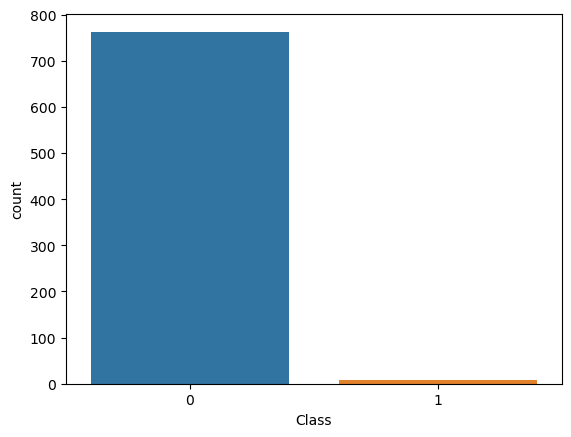

In [4]:

import seaborn as sns
sns.countplot(x='Class', data=df)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#divide data into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.25, random_state=3)
X_train.shape, X_test.shape

((579, 30), (193, 30))

In [7]:
testing_df = pd.concat([X_test, y_test], axis=1)
testing_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51,36,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
186,123,0.968784,-0.501798,-1.333558,0.388804,2.036091,3.661714,-0.236795,0.809586,0.154501,...,-0.091052,-0.561280,-0.260983,1.017700,0.837225,-0.342889,-0.003467,0.039004,160.86,0
27,23,1.322707,-0.174041,0.434555,0.576038,-0.836758,-0.831083,-0.264905,-0.220982,-1.071425,...,-0.284376,-0.323357,-0.037710,0.347151,0.559639,-0.280158,0.042335,0.028822,16.00,0
163,103,1.245744,0.438878,0.316140,1.107634,-0.178446,-0.941091,0.286291,-0.290079,-0.169188,...,0.038621,0.208207,-0.111479,0.419907,0.722345,-0.331446,0.020337,0.022443,4.19,0
86,55,-0.773450,0.853112,0.818254,-0.236070,0.803463,-1.438728,0.799479,-0.007989,-0.761090,...,0.035362,-0.116890,-0.178926,0.400155,-0.026231,0.165156,0.027762,0.132980,0.76,0


### Over sampling to solve the problem of imbalanced dataset using SMOTE

In [8]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42, sampling_strategy='auto')

X_resampled,y_resampled = sm.fit_resample(X_train,y_train)
X_resampled.shape, y_resampled.shape

((1140, 30), (1140,))

## Sampling Technique 1 : Random Sampling

In [9]:
import math
n = (1.96**2)*0.5*(1-0.5)/(0.05**2)
X_sample = X_resampled.sample(n = math.floor(n) , replace = False, random_state = 32)
y_sample = y_resampled[X_sample.index]
X_sample.shape, y_sample.shape

((384, 30), (384,))

In [10]:
X_sample.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
390,93,-0.853807,0.127392,1.267277,0.678584,-1.029851,-0.487614,1.836071,-0.298566,-0.922127,...,0.776141,0.252358,0.179725,0.476744,0.724705,0.526798,0.502701,-0.159465,0.002761,322.440000
325,340,1.195494,0.194929,0.617510,0.649717,-0.474718,-0.716084,-0.027078,-0.073385,0.057251,...,-0.153417,-0.211729,-0.590119,0.210111,0.388014,0.092789,0.104973,-0.013644,0.018238,0.990000
797,246,-0.341069,1.066910,-0.553116,2.171719,-0.438903,-1.229664,-1.087304,0.510560,-1.219947,...,0.012709,0.072496,-0.475811,-0.137364,0.330824,0.139246,0.131900,0.103934,-0.047033,1.486461
1135,503,-0.458270,0.391003,1.432862,0.291855,0.681767,-0.936787,0.710343,-0.168134,-0.108464,...,-0.108718,-0.009566,0.044506,-0.175079,0.376301,0.354578,-0.336013,-0.086767,-0.092082,1.062333
620,479,-1.006019,0.485678,1.552460,0.397483,0.882575,-0.930594,0.686661,-0.069418,-0.290081,...,-0.104478,0.091739,0.263562,-0.269635,0.381714,0.371603,-0.418287,-0.083864,-0.126751,0.943697


In [11]:
y_sample.head()

390     0
325     0
797     1
1135    1
620     1
Name: Class, dtype: int64

### Model 1 : Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_sample, y_sample)
y_pred = nb.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))



Accuracy:  0.6217616580310881


### Model 2 : Grid Search CV

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_sample, y_sample)
y_pred = grid.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.494 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.494 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.636 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.779 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.789 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.805 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.805 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.792 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.805 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.803 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.779 total time=   0.0s
[CV 4/5] END ...C=1000, gamm

### Model 3 : Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_sample, y_sample)
y_pred = lr.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))


Accuracy:  0.8601036269430051


### Model 4 : Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_sample, y_sample)
y_pred = rf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9948186528497409


### Model 5 : Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_sample, y_sample)
y_pred = dt.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.917098445595855


## Sampling Technique 2 : Systematic Sampling

In [17]:
import random as rd
def sample_systematic(X_resampled, sample_size, state = None):
    length = len(df)
    print(length)
    interval = length // sample_size
    print(interval)
    rd.seed(state)
    first = rd.randint(0, interval)
    indexes = np.arange(first, length, step = interval)
    return X_resampled.iloc[indexes]


In [18]:
X_sample = sample_systematic(X_resampled, 385, 42)
y_sample = y_resampled[X_sample.index]
X_sample.shape, y_sample.shape

772
2


((385, 30), (385,))

In [19]:
X_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2,421,-1.397776,0.004573,2.528964,0.648279,-0.196625,0.163190,-0.278296,0.366045,0.435493,...,0.056481,-0.087222,0.150044,0.322306,0.091753,0.171955,0.509403,0.266858,0.094296,12.41
4,302,1.073785,-0.170037,0.790656,1.128605,-0.585960,0.070807,-0.414937,0.057949,0.503324,...,0.086693,0.100287,0.147604,-0.184878,-0.460811,0.423909,-0.318168,0.046111,0.046843,90.00
6,491,-0.946412,0.609500,1.201710,0.113074,-0.210132,-0.954009,0.130325,0.293270,-0.579076,...,0.144104,-0.036421,-0.266529,-0.038869,0.481943,-0.277006,0.949985,-0.079616,-0.016606,18.45
8,330,1.207788,-0.006915,0.361347,0.778857,-0.404622,-0.503633,0.008942,-0.123996,0.478882,...,-0.053846,-0.239519,-0.560161,-0.054801,0.059684,0.493781,0.288738,-0.027264,0.013754,32.38
10,551,-0.444316,0.874648,2.397414,0.834892,0.396998,-0.023138,1.196551,-0.672690,-0.133217,...,0.229732,-0.168400,0.127108,-0.339154,0.567472,0.000614,-0.521283,-0.626836,-0.563631,8.84


In [20]:
y_sample.head()

2     0
4     0
6     0
8     0
10    0
Name: Class, dtype: int64

### Model 1 : Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_sample, y_sample)
y_pred = nb.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))



Accuracy:  0.9378238341968912


### Model 2 : Grid Search CV

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_sample, y_sample)
y_pred = grid.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.844 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.831 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.896 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.844 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.896 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.805 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.727 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.883 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.831 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.870 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.844 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END ..C=1000, gamma

### Model 3 : Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_sample, y_sample)
y_pred = lr.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))


Accuracy:  0.9119170984455959


### Model 4 : Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_sample, y_sample)
y_pred = rf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9948186528497409


### Model 5 : Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_sample, y_sample)
y_pred = dt.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.917098445595855


## Sampling Technique 3 : Stratified Sampling

In [26]:
train_df = pd.concat([X_resampled, y_resampled], axis=1)
train_df['Class'].value_counts()

0    570
1    570
Name: Class, dtype: int64

In [27]:
def stratified_sampling(df,sample_size = 0.5):
    
    return df.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac = sample_size, replace = False))

In [28]:
sample_df = stratified_sampling(train_df)
sample_df.shape


(570, 31)

In [29]:
X_sample = sample_df.drop('Class', axis=1)
y_sample = sample_df['Class']

### Model 1 : Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_sample, y_sample)
y_pred = nb.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))



Accuracy:  0.7253886010362695


### Model 2 : Grid Search CV

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_sample, y_sample)
y_pred = grid.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.570 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.570 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.596 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.553 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.553 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.605 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.772 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.851 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.816 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.789 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.798 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.877 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.860 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.842 total time=   0.0s
[CV 5/5] END ....C=1000, gam

### Model 3 : Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression(solver='lbfgs', max_iter=2000)
lr.fit(X_sample, y_sample)
y_pred = lr.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))



Accuracy:  0.8497409326424871


### Model 4 : Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=3)
rf.fit(X_sample, y_sample)
y_pred = rf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9948186528497409


### Model 5 : Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_sample, y_sample)
y_pred = dt.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9222797927461139


## Sampling Technique 4 :  Cluster Sampling

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(train_df)

#cluster labels added to the dataframe
train_df['cluster'] = kmeans.labels_


In [36]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,cluster
0,27,-1.452187,1.765124,0.611669,1.176825,-0.445980,0.246826,-0.257566,1.092472,-0.607524,...,0.325782,-0.069107,0.020962,-0.044668,-0.243441,0.149180,0.120557,1.80,0,0
1,550,-1.274193,1.722263,0.429337,0.105932,-0.732006,-1.107861,-0.021279,0.818796,-0.447669,...,-0.786584,0.106722,0.313637,-0.083626,0.083494,0.109637,0.018247,16.83,0,1
2,421,-1.397776,0.004573,2.528964,0.648279,-0.196625,0.163190,-0.278296,0.366045,0.435493,...,0.150044,0.322306,0.091753,0.171955,0.509403,0.266858,0.094296,12.41,0,1
3,70,-0.426072,-0.060304,2.220828,0.024742,-0.584964,0.460623,-0.322526,0.434776,1.252404,...,0.769878,-0.092634,0.150536,-0.234230,0.504710,0.069158,0.041024,21.80,0,0
4,302,1.073785,-0.170037,0.790656,1.128605,-0.585960,0.070807,-0.414937,0.057949,0.503324,...,0.147604,-0.184878,-0.460811,0.423909,-0.318168,0.046111,0.046843,90.00,0,0


In [37]:
train_df['cluster'].value_counts()

1    667
0    473
Name: cluster, dtype: int64

In [38]:
rd.seed(42)
cluster = rd.randint(0, 1)


In [39]:
sample_df = train_df[train_df['cluster'] == cluster]
sample_df.shape

(473, 32)

In [40]:
sample_df['Class'].value_counts()

0    314
1    159
Name: Class, dtype: int64

In [41]:
X_sample = sample_df.drop(['Class', 'cluster'], axis=1)
y_sample = sample_df['Class']

### Model 1 : Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_sample, y_sample)
y_pred = nb.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))



Accuracy:  0.8860103626943006


### Model 2 : Grid Search CV

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_sample, y_sample)
y_pred = grid.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.663 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.663 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.663 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.670 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.660 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.663 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.663 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.663 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.670 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.660 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.663 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.809 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.832 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.926 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.915 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.904 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.905 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.958 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.915 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.819 total time=   0.0s
[CV 1/5] END ...C=1000, gamm

### Model 3 : Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_sample, y_sample)
y_pred = lr.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))


Accuracy:  0.917098445595855


### Model 4 : Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=4)
rf.fit(X_sample, y_sample)
y_pred = rf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9948186528497409


### Model 5 : Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_sample, y_sample)
y_pred = dt.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9792746113989638


## Sampling Technique 5 : Reservoir Sampling

In [47]:
train_df = train_df.drop('cluster', axis=1)

In [48]:
def sample_reservoir(dataframe, sample_size, state = None):
    stream = []
    size = len(dataframe)
    
    for i in range(size):
        stream.append(i)
    
    i = 0
    reservoir = [0] * sample_size
    for i in range(sample_size):
        reservoir[i] = stream[i]
    
    rd.seed(state)
    while i < size:
        j = rd.randrange(i + 1)
        if j < sample_size:
            reservoir[j] = stream[i]
        i += 1
    
    
    return dataframe.iloc[reservoir]

In [49]:
sample_df = sample_reservoir(train_df, 400, 42)

In [50]:
sample_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
978,286,-0.061614,0.344225,1.097533,0.291181,0.595932,-0.566404,0.487532,-0.057805,-0.188429,...,-0.053047,-0.094669,-0.111130,0.088964,0.299585,-0.216896,-0.065429,-0.068344,1.690745,1
929,513,-2.038975,-1.947402,1.964722,1.492239,2.094254,0.345229,-2.162829,0.862696,0.499281,...,0.434132,1.043761,0.203803,-0.712021,-0.186808,0.776828,-0.077082,-0.167636,1.315148,1
685,426,-0.583433,0.390631,1.513997,0.263262,0.755165,-0.927725,0.753937,-0.163891,-0.114130,...,0.010472,0.105489,-0.197016,0.378128,0.363461,-0.367247,-0.091645,-0.101032,1.266819,1
805,449,-2.124360,1.329992,-0.693871,2.473550,-0.049671,-1.054915,-1.618276,0.981950,-1.855208,...,0.289039,-0.086462,-0.398620,0.137561,-0.079786,0.198303,0.062592,-0.221969,0.327497,1
4,302,1.073785,-0.170037,0.790656,1.128605,-0.585960,0.070807,-0.414937,0.057949,0.503324,...,0.100287,0.147604,-0.184878,-0.460811,0.423909,-0.318168,0.046111,0.046843,90.000000,0


In [51]:
X_sample = sample_df.drop('Class', axis=1)
y_sample = sample_df['Class']

### Model 1 : Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_sample, y_sample)
y_pred = nb.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))



Accuracy:  0.7305699481865285


### Model 2 : Grid Search CV

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_sample, y_sample)
y_pred = grid.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))




Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.588 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.825 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.812 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.850 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END ...C=1000, gamm

### Model 3 : Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_sample, y_sample)
y_pred = lr.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))


Accuracy:  0.8704663212435233


### Model 4 : Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=5)
rf.fit(X_sample, y_sample)
y_pred = rf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9948186528497409


### Model 5 : Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_sample, y_sample)
y_pred = dt.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9326424870466321
